

# DAND Project 3: Investigate the TMDB Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
# Introduction

This is an analysis of a dataset that contains data for about 10,000 movies, short films and tv series, collected from The Movie Database (TMDb). Among other things it holds data on user ratings, revenue, release date, runtime and budget for each movie. 

Please note that at the end of each research question section, there is a brief discussion of the findings. The conclusion deals with the limitations of my analysis. In between code I sometimes comment on choices I make in data filtering/cleaning.

Research questions:

1. How does budget_adj compare to popularity and vote_average?
2. How does vote_average compare to popularity?
3. What are the mean revenues generated by each genre?
4. Which genres are most popular from year to year?



In [68]:
# The packages to use.
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt
% matplotlib inline

df = pd.read_csv('tmdb-movies.csv')

<a id='wrangling'></a>
# Data Wrangling

> In this section of the report, I will load in tmdb-movies.csv, check for cleanliness, and then trim and clean the dataset for analysis.

### General Properties

In [69]:
# Load your data and print out a few lines. Perform operations to inspect data
# types and look for instances of missing or possibly errant data.

df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09



There are columns for budget and revenue, but also for budget_adj and revenue_adj. What is the difference? In the discussion forum of the TMDB dataset page someone had answered this question: "Budget_adj and revenue_adj show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time."


In [70]:
# number of rows and columns in the df
df.shape

(10866, 21)

In [71]:
# examine df with .describe
df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


Release_date would need to be changed to datetime format to be useful, but I'm not going to use it. The columns 'runtime', 'budget' and 'revenue' and 'budget_adj' and 'revenue_adj' quite often have 0 as values. This accounts for the large number of 0.0000 values you see above in the percentages. Above we can also see that the dataset has been trimmed - the earliest movie being from 1960. So not all movies ever made are in this dataset. 

> Let's look at the missing values in the dataset:

In [72]:
# which columns have missing values?
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [73]:
# another way to look at it
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [74]:
# count number of occurences of '0' in budget_adj
df.query('budget_adj == "0"').budget_adj.count()

5696

In [75]:
# count number of occurences of '0' in revenue_adj
df.query('revenue_adj == "0"').revenue_adj.count()

6016

In [76]:
# count number of occurences of '0' in the runtime column
df.query('runtime == "0"').runtime.count()

31

> There are nine columns with missing data (imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production_companies). Many of these are irrelevant for the analysis. I am going to drop id, imdb_id, budget, revenue, cast, homepage, director, tagline, keywords (although these are interesting to look explore), overview, production_companies and release_date in the cells below. I will be dropping budget and revenue because budget_adj and revenue_adj are more relevant and useful. Initially I filled the '0' values in these columns with the mean of the data that is present in the column. However, upon exploring the histograms I realized that by filling in the average, I was meddling with the data in such a way that it would affect statistical reliability. Every value up to 75% was basically the average that I entered. As seen above, about half of budget_adj contains 0 as value, and there were even more zeros for revenue_adj. For runtime it does make sense to fill in the 0 values with the mean, because of the low number of zeros. Because using regression is for now beyond the scope of what I can do, I chose to drop rows in which budget_adj and/or revenue_adj are 0, creating a new df (clean_df).

>> Next up is the data cleaning.



# Data Cleaning

In [77]:
# drop obsolete columns
df.drop(['id', 'imdb_id', 'budget', 'revenue', 'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview', 'production_companies', 'release_date'], axis=1, inplace=True)

In [78]:
# check what columns are in the dataset now
df.columns

Index(['popularity', 'original_title', 'runtime', 'genres', 'vote_count',
       'vote_average', 'release_year', 'budget_adj', 'revenue_adj'],
      dtype='object')

In [79]:
# just being curious. which movie had the biggest budget?
df[df['budget_adj'] == df['budget_adj'].max()]

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
2244,0.25054,The Warrior's Way,100,Adventure|Fantasy|Action|Western|Thriller,74,6.4,2010,425000000.0,11087569.0


In [80]:
# wait, what? let's check again. Do I read that right, 425 million for a movie I've never heard of?
df['budget_adj'].max()

425000000.0

> I was a little suspicious of this outlier. A 425 million dollar budget but only 11 million revenue? I looked it up on imdb and indeed the budget was not 425 million for The Warrior's Way, but 45 million. The value for revenue was correct. I'll be adjusting this value below. What about that outragious value for max revenue_adj?

In [81]:
df[df['revenue_adj'] == df['revenue_adj'].max()]

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
1386,9.432768,Avatar,162,Action|Adventure|Fantasy|Science Fiction,8458,7.1,2009,2.408869e+08,2.827124e+09


In [82]:
# let's make that more legible.
df['revenue_adj'].max()

2827123750.41189

> 2.827.123.750.  This number, however, is correct. According to imdb, the Cumulative Worldwide Gross for Avatar was $2,787,965,087 on 13 February 2015. I'll adjust the value for *The Warrior's Way* before I can continue filling in the averages for the missing values:

In [83]:
# change the value in cell using index and numeric column value
df.loc['2244', 'budget_adj'] = 42500000.0

In [84]:
# check new value for The Warrior's Way budget_adj
df.iloc[2244]

popularity                                          0.25054
original_title                            The Warrior's Way
runtime                                                 100
genres            Adventure|Fantasy|Action|Western|Thriller
vote_count                                               74
vote_average                                            6.4
release_year                                           2010
budget_adj                                         4.25e+08
revenue_adj                                     1.10876e+07
Name: 2244, dtype: object

That looks better. I quickly checked the new value for maximum budget_adj: it belongs to *Pirates of the Caribbean, On stranger Tides*. This value seems to be correct.

Now we can start cleaning and adjusting some data, like replacing the 0 values in runtime with the mean, and eventually dealing with the 0 values in budget_adj and revenue_adj.

In [85]:
# calculate runtime mean to fill in 0 values 
df['runtime'].mean()

102.07086324314375

In [86]:
# fill in 0 values for runtime
df['runtime'] = df['runtime'].replace(0, 102.07086324314375)

In [87]:
# look at new values for runtime
df[['runtime']].describe()

,runtime
count,10866.000000
mean,102.362065
std,30.902781
min,2.000000
25%,90.000000
50%,99.000000
75%,111.000000
max,900.000000


In [88]:
# are there any duplicate rows?
sum(df.duplicated())

1

In [89]:
# remove duplicate rows
df.drop_duplicates(inplace=True)

In [90]:
# check again for duplicates
sum(df.duplicated())

0

In [91]:
# examine datatypes
df.dtypes

popularity        float64
original_title     object
runtime           float64
genres             object
vote_count        float64
vote_average      float64
release_year      float64
budget_adj        float64
revenue_adj       float64
dtype: object

In [92]:
# Create df for budget_adj and revenue_adj with values that are not 0. 
# I added .copy() to avoid the SettingWithCopyWarning message. 
# https://stackoverflow.com/questions/49336357/how-to-delete-the-entire-row-if-any-of-its-value-is-0-in-pandas?noredirect=1&lq=1
# https://codereview.stackexchange.com/questions/185389/dropping-rows-from-a-pandas-dataframe-where-some-of-the-columns-have-value-0   

clean_df = df[(df[['budget_adj','revenue_adj']] != 0).all(axis=1)].copy()

In [93]:
#look at 
clean_df.describe()

,popularity,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,3854.000000,3854.000000,3854.000000,3854.000000,3854.000000,3.855000e+03,3.854000e+03
mean,1.191554,109.220291,527.720291,6.168163,2001.261028,4.423954e+07,1.370647e+08
std,1.475162,19.922820,879.956821,0.794920,11.282575,4.480345e+07,2.161114e+08
min,0.001117,15.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.370705e+00
25%,0.462368,95.000000,71.000000,5.700000,1995.000000,1.309053e+07,1.835735e+07
50%,0.797511,106.000000,204.000000,6.200000,2004.000000,3.001664e+07,6.173068e+07
75%,1.368324,119.000000,580.000000,6.700000,2010.000000,6.061307e+07,1.632577e+08
max,32.985763,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09


<a id='eda'></a>
# Exploratory Data Analysis




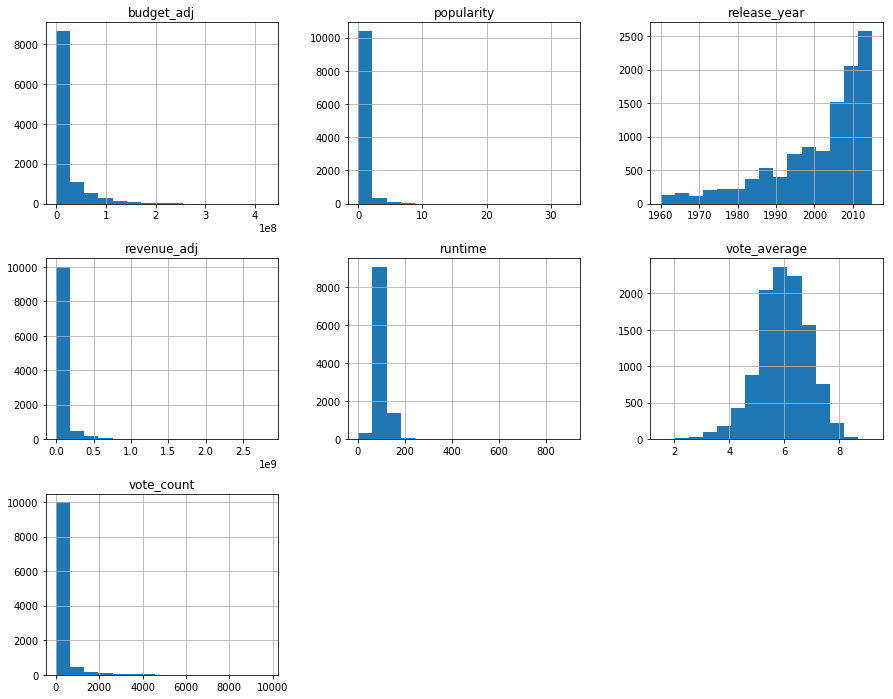

In [94]:
# take a look at the histograms for the original, complete df
df.hist(figsize=(15,12), bins=15);

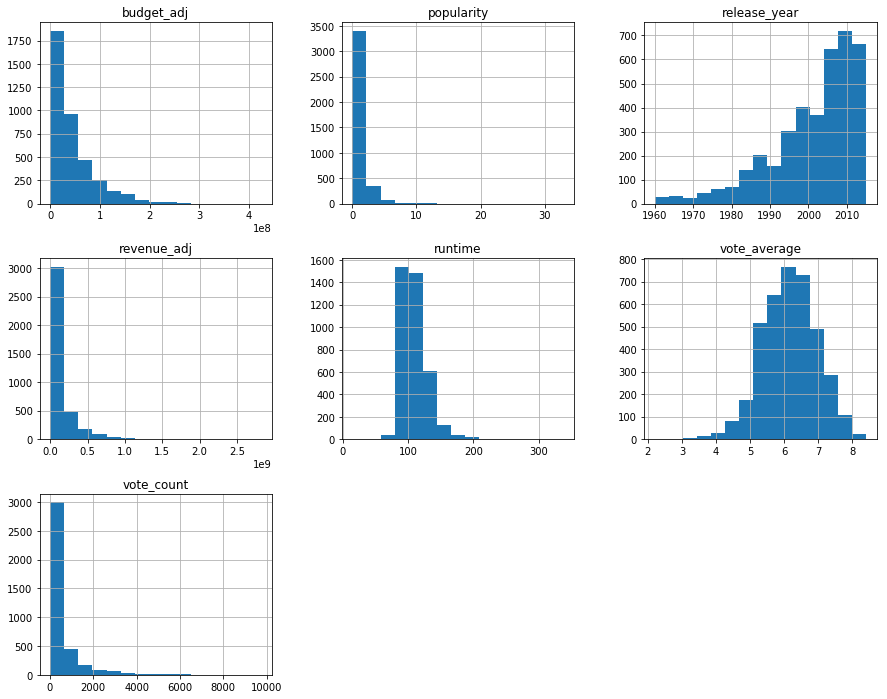

In [95]:
# take a look at the histograms for clean_df
clean_df.hist(figsize=(15,12), bins=15);

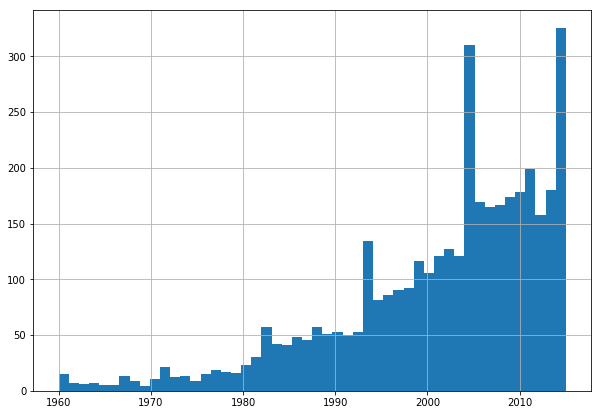

In [96]:
#look at budget_adj in more detail
clean_df['release_year'].hist(figsize=(10,7), bins=50);

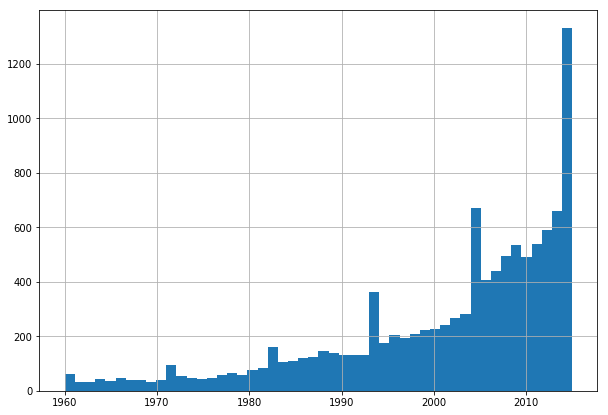

In [97]:
df['release_year'].hist(figsize=(10,7), bins=50);

> At first glance we can see that the majority of movies were not made with multiple million dollar budgets, that only a very small amount of movies have extremely high popularity, that the number of movies released increases each year, that most movies have a revenue that falls in the lowest segment, that runtime lies typically around 100 minutes. The majority of the vote averages (ratings) fall between 5 and 7, and the majority of movies have a low vote count.

>Despite the fact that the adjustment from the original df to clean_df has drastically reduced the amount of data, the differences in the histograms of both datasets are minimal. Clean_df shows a drop in count in release_year in 2012, but a the histogram of this column from the original df shows growth.

# Research question 1: How does budget_adj compare to popularity and vote_average?

In other words: are high budget movies more popular? Do they get higher ratings than movies with a lower budget?

In [98]:
# View the min, 25%, 50%, 75%, max budget_adj values 
clean_df['budget_adj'].describe()

count    3.855000e+03
mean     4.423954e+07
std      4.480345e+07
min      9.693980e-01
25%      1.309053e+07
50%      3.001664e+07
75%      6.061307e+07
max      4.250000e+08
Name: budget_adj, dtype: float64

In [99]:
#split up clean_df['budget_adj'] into # Bin edges that will be used to "cut" the data into groups
budget_bin_edges = [9.693980e-01, 1.309053e+07, 3.001611e+07, 6.061307e+07, 3.683713e+08]

In [100]:
# Labels for the four budget level groups
budget_bin_names = ['low', 'medium', 'mod_high', 'high']

In [101]:
# Creates budget_levels column
clean_df.loc[:,'budget_levels'] = pd.cut(clean_df['budget_adj'], budget_bin_edges, labels=budget_bin_names)

# Checks for successful creation of this column
clean_df.head(20)

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_levels
0,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09,high
1,28.419936,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08,high
2,13.112507,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08,high
3,11.173104,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09,high
4,9.335014,Furious 7,137.0,Action|Crime|Thriller,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09,high
5,9.110700,The Revenant,156.0,Western|Drama|Adventure|Thriller,3929.0,7.2,2015.0,1.241999e+08,4.903142e+08,high
6,8.654359,Terminator Genisys,125.0,Science Fiction|Action|Thriller|Adventure,2598.0,5.8,2015.0,1.425999e+08,4.053551e+08,high
7,7.667400,The Martian,141.0,Drama|Adventure|Science Fiction,4572.0,7.6,2015.0,9.935996e+07,5.477497e+08,high
8,7.404165,Minions,91.0,Family|Animation|Adventure|Comedy,2893.0,6.5,2015.0,6.807997e+07,1.064192e+09,high
9,6.326804,Inside Out,94.0,Comedy|Animation|Family,3935.0,8.0,2015.0,1.609999e+08,7.854116e+08,high


In [102]:
# determine mean budget_adj for each budget level
budget_means = clean_df.groupby(['budget_levels'], as_index=False)['budget_adj'].mean()

In [103]:
# list of means for each budget level
budget_means.info

<bound method DataFrame.info of   budget_levels    budget_adj
0           low  6.220931e+06
1        medium  2.104057e+07
2      mod_high  4.267598e+07
3          high  1.067637e+08>

In [104]:
# examine the popularity mean for each budget level
clean_df.groupby('budget_levels').mean().popularity

budget_levels
low         0.710415
medium      0.930916
mod_high    1.159882
high        1.967777
Name: popularity, dtype: float64

In [105]:
# do the same for vote_average
clean_df.groupby('budget_levels').mean().vote_average

budget_levels
low         6.182919
medium      6.169719
mod_high    6.153008
high        6.166736
Name: vote_average, dtype: float64

In [106]:
# let's check that again by dividing budget_adj in half and assigning it to a high and low category
clean_df.budget_adj.median()

30016643.415797602

In [107]:
# divide budget_adj in two halves using the median
lower_budget = clean_df.query('budget_adj < 30016111.9054567')
higher_budget = clean_df.query('budget_adj >= 30016111.9054567')

In [108]:
# show the difference in popularity for the lower vs higher budget
lower_budget.popularity.mean(), higher_budget.popularity.mean()

(0.8203794411001555, 1.5627287426050853)

In [109]:
# show the difference in vote_average in lower vs higher budget
lower_budget.vote_average.mean(), higher_budget.vote_average.mean()

(6.176336274001043, 6.159989621172817)

In [110]:
# how can I select data with a particular value, i.e., only 'low' in budget_levels?
low_budget_df = clean_df[clean_df.budget_levels=='low']
low_budget_df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_levels
35,3.557846,Room,117.0,Drama|Thriller,1520.0,8.0,2015.0,5.519998e+06,3.256960e+07,low
39,3.227329,Brooklyn,111.0,Drama|Romance,754.0,7.3,2015.0,1.012000e+07,5.711002e+07,low
45,3.023253,Hardcore Henry,97.0,Action|Adventure|Science Fiction,396.0,5.9,2015.0,9.199996e+06,1.318708e+07,low
47,2.968254,Paper Towns,109.0,Drama|Mystery|Romance,1252.0,6.2,2015.0,1.104000e+07,7.867128e+07,low
49,2.885126,The Lobster,118.0,Thriller|Comedy|Drama|Romance|Science Fiction,638.0,6.6,2015.0,3.679998e+06,8.339346e+06,low


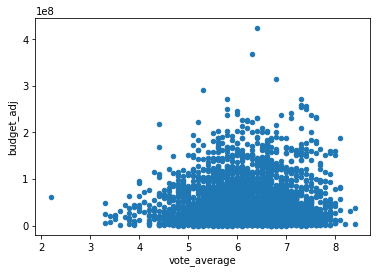

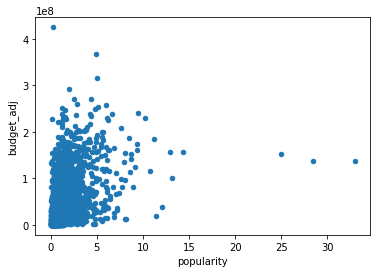

In [111]:
# Visualise possible correlation between budget/vote average and budget/popularity with scatter plot
clean_df.plot(x='vote_average',y='budget_adj', kind='scatter');
clean_df.plot(x='popularity',y='budget_adj', kind='scatter');

<br>
A lower budget does not mean people will give lower ratings than they would to a high budget movie. Vote_average actually decreases slightly with a higher budget, looking at the average vote_average for each budget level. The scatter plot above confirms this. It does not show a positive correlation between budget_adj and vote_average. Rather, it shows how low budget movies can have high ratings, and high budget movies can have low ratings.

Looking at the mean popularity for each budget level, we can already see that low, medium and mod-high all lie closely together, in the range between 0.7 and 1.2, and that the average popularity for high budget movies is very high compared to the other budget levels: 1.97 (rounded). Looking at the scatter plot, we can see that whereas in the histogram we could only see that a very small amount of movies have a very high popularity (visible as outliers in the scatter plot), the scatter plot shows us that high budget movies can also have low popularity. It shows no correlation at all.
<br>
<br>

In [112]:
# Just curious: which movies are the popularity outliers?
most_popular = df.query('popularity >= 10')
most_popular

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124.0,Action|Adventure|Science Fiction|Thriller,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120.0,Action|Adventure|Science Fiction|Thriller,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119.0,Adventure|Science Fiction|Thriller,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136.0,Action|Adventure|Science Fiction|Fantasy,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09
629,24.949134,Interstellar,169.0,Adventure|Drama|Science Fiction,6498.0,8.0,2014.0,1.519800e+08,5.726906e+08
630,14.311205,Guardians of the Galaxy,121.0,Action|Science Fiction|Adventure,5612.0,7.9,2014.0,1.565855e+08,7.122911e+08
631,12.971027,Captain America: The Winter Soldier,136.0,Action|Adventure|Science Fiction,3848.0,7.6,2014.0,1.565855e+08,6.583651e+08
632,11.422751,John Wick,101.0,Action|Thriller,2712.0,7.0,2014.0,1.842182e+07,7.252661e+07
633,10.739009,The Hunger Games: Mockingjay - Part 1,123.0,Science Fiction|Adventure|Thriller,3590.0,6.6,2014.0,1.151364e+08,6.927528e+08
634,10.174599,The Hobbit: The Battle of the Five Armies,144.0,Adventure|Fantasy,3110.0,7.1,2014.0,2.302728e+08,8.797523e+08


# Research Question 2: How does vote_average compare to popularity?

In other words, do movies with high popularity get higher ratings and vice versa?

For this question, I can use the original dataframe, df, because the columns I will use did not need any data cleaning.

Read about how the popularity value is built here:
https://developers.themoviedb.org/3/getting-started/popularity
<br>
<br>

In [113]:
# examine vote_average with .describe
df['vote_average'].describe()

count    10865.000000
mean         5.975012
std          0.935138
min          1.500000
25%          5.400000
50%          6.000000
75%          6.600000
max          9.200000
Name: vote_average, dtype: float64

In [114]:
# examine popularity with .describe
df['popularity'].describe()

count    10865.000000
mean         0.646446
std          1.000231
min          0.000065
25%          0.207575
50%          0.383831
75%          0.713857
max         32.985763
Name: popularity, dtype: float64

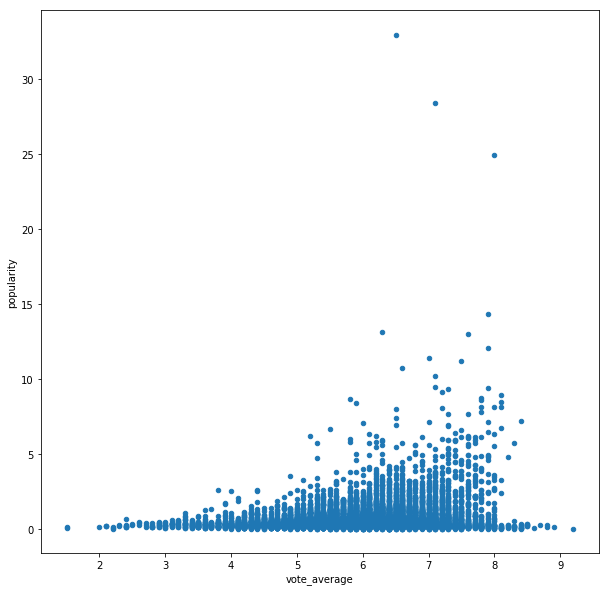

In [115]:
# plot the two in a scatter plot
df.plot(x='vote_average',y='popularity', kind='scatter', figsize=(10,10));

><br>
The scatter plot above seems to show a trend. Where vote_average increases, the number of entries with higher popularity also increases, looking not only at the upward trend in the cluster of dots but also at the ones fleeting around. These outliers appear from popularity value 5 upwards. 
<br>
<br>
What is striking is the low popularity of movies with a vote average of 8 and upwards. Apparently a great movie does not automatically draw a lot of attention from people looking for movies. My humble theory is that this is related to popularity being a value that fluctuates more and faster than vote average over time. I.e. a new movie gets a lot of traffic on the website, which makes the popularity go up - but probably temporarily. This could be different a year later, yet the vote average has not dropped as much as popularity. (It would be interesting to have insight into the popularity trends and vote_average per movie and year/month!)
<br>
<br>
As a frequent visitor of IMDB, I have noticed that a movie's vote average usually drops a couple of decimal points over the year(s) after its first release. Perhaps dvd releases invite different kinds of votes (coming in a while after the cinema release), that are less biased. A movie experience is usually better in a cinema.
<br>

<br>
<br>

# Research question 3: What are the mean revenues generated by each genre?

In other words: which genres generate what levels of revenue? Which genres are most profitable?

In [116]:
# Inspect the genres column
clean_df['genres'].describe()

count      3854
unique     1053
top       Drama
freq        245
Name: genres, dtype: object

In [117]:
#Check for null values
clean_df['genres'].isnull().sum()

1

In [118]:
# Check type
type(clean_df['genres'][0])

str

>The genres column often contains several values. I don't want to count all the occurences of these values, I will regard the first entry as the 'main genre' a movie belongs to. I'll have to drop all the values that come after the first value. 

In [119]:
# Make new df that selects only the first entry in the genres cells
new_genre_df = clean_df['genres'].str.split('|').str[0]
new_genre_df.head()

0       Action
1       Action
2    Adventure
3       Action
4       Action
Name: genres, dtype: object

In [120]:
# Replace old genre column with new_genre_df
clean_df.loc[:, 'genres'] = new_genre_df

In [121]:
# It looks like the genres column has been successfully modified
clean_df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj,budget_levels
0,32.985763,Jurassic World,124.0,Action,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09,high
1,28.419936,Mad Max: Fury Road,120.0,Action,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08,high
2,13.112507,Insurgent,119.0,Adventure,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08,high
3,11.173104,Star Wars: The Force Awakens,136.0,Action,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09,high
4,9.335014,Furious 7,137.0,Action,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09,high


In [122]:
# value counts for each genre
clean_df['genres'].value_counts()

Drama              890
Comedy             787
Action             689
Adventure          314
Horror             275
Crime              171
Thriller           160
Fantasy            110
Animation          103
Science Fiction     98
Romance             66
Family              40
Mystery             36
Documentary         32
Music               29
War                 20
History             17
Western             16
TV Movie             1
Name: genres, dtype: int64

In [123]:
# Divide revenue_adj in half and assign values to a high and low category
rev_mean = clean_df.revenue_adj.median()
rev_mean

61730679.07895175

In [124]:
# divide revenue_adj in two halves using the median. (Note: I don't use these variables in the rest of the analysis.)
lower_revenue = clean_df.query('revenue_adj < 61730679.07895175')
higher_revenue = clean_df.query('revenue_adj >= 61730679.07895175')

In [125]:
#look at mean revenue_adj for each genre
genre_rev_means = clean_df.groupby(['genres'], as_index=True)['revenue_adj'].mean()
sorted_genrevmeans = genre_rev_means.sort_values(ascending=False)
sorted_genrevmeans

genres
Adventure          3.041586e+08
Animation          2.959841e+08
Family             2.728411e+08
Science Fiction    2.171706e+08
Fantasy            1.943293e+08
History            1.680665e+08
Action             1.626525e+08
War                1.405774e+08
Music              1.285718e+08
Romance            1.242896e+08
Western            1.158031e+08
Comedy             1.006022e+08
Crime              9.841484e+07
Thriller           9.109040e+07
Drama              9.096426e+07
Mystery            8.748986e+07
Horror             7.877088e+07
TV Movie           5.838910e+07
Documentary        2.363154e+07
Name: revenue_adj, dtype: float64

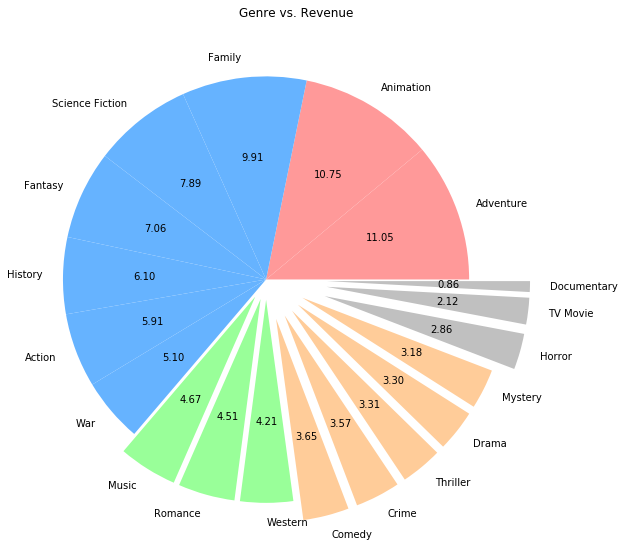

In [126]:
# Plot pie for revenue means per genre with percentages. Let percentages below 5 "explode" and set colors.
# https://stackoverflow.com/questions/29786807/how-to-make-a-pie-chart-smaller-with-matplotlib
# https://stackoverflow.com/questions/6170246/how-do-i-use-matplotlib-autopct
# https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f
genre_labels = ['Adventure', 'Animation', 'Family', 'Science Fiction', 'Fantasy', 'History', 'Action', 'War', 'Music', 'Romance', 'Western', 'Comedy', 'Crime', 'Thriller', 'Drama', 'Mystery', 'Horror', 'TV Movie', 'Documentary']        
explode=(0,0,0,0,0,0,0,0,0.1,0.1,0.1,0.2,0.2,0.2,0.2,0.2,0.3,0.3,0.3)
colors = ['#ff9999','#ff9999','#66b3ff','#66b3ff','#66b3ff','#66b3ff','#66b3ff','#66b3ff','#99ff99','#99ff99','#99ff99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','#ffcc99','silver','silver','silver']
plt.pie(sorted_genrevmeans, explode=explode, labels=genre_labels, colors=colors, autopct='%.2f') # autopct floats can be adjusted
plt.axis('equal') # make sure the shape is a perfect circle
plt.title('Genre vs. Revenue\n\n')
fig = plt.gcf() # set size of pie
fig.set_size_inches(9,9) # set size of pie
plt.show()

This chart does not tell us much other than what genres have produced what amount of revenue on average, over the span of 55 years. The time element and the development of movie genres in general over the decades should be taken in consideration here. For example, 'action' has become common as a main genre only in the last two or three decades, whereas westerns are hardly being made any more. The outcome of this pie chart is is interesting especially when you take the value counts into account. The genres that are produced most frequently are not the ones that promise the highest revenue. I.e. drama and comedy have high value counts but are in the lower percentages of revenue. Where Adventure and Animation have high revenues, they do not have the highest value counts. I'm surprised by animation being in the top 2, but that may be because animation can speak to a wide audience, both parents and children, if it is made well.
<br>
<br>

## Research question 4: Which genres are most popular from year to year?

I will use the same filter for genre entry as used above, but I will use it on the original df. The code below does not lead up to a visualization, but more of an overview/list per year.

In [127]:
# look at release year for original df
df['release_year'].describe()

count    10865.000000
mean      2001.321859
std         12.813260
min       1960.000000
25%       1995.000000
50%       2006.000000
75%       2011.000000
max       2015.000000
Name: release_year, dtype: float64

Steady increase of movies being made is visible even here!

In [128]:
# create new df for genres with only the first entry from the original df.
genre_df = df['genres'].str.split('|').str[0].copy()
genre_df.head()

0       Action
1       Action
2    Adventure
3       Action
4       Action
Name: genres, dtype: object

In [129]:
# put the values from genre_df in the genres column of the original df
df.loc[:,'genres'] = genre_df
df.head()

,popularity,original_title,runtime,genres,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,Jurassic World,124.0,Action,5562.0,6.5,2015.0,1.379999e+08,1.392446e+09
1,28.419936,Mad Max: Fury Road,120.0,Action,6185.0,7.1,2015.0,1.379999e+08,3.481613e+08
2,13.112507,Insurgent,119.0,Adventure,2480.0,6.3,2015.0,1.012000e+08,2.716190e+08
3,11.173104,Star Wars: The Force Awakens,136.0,Action,5292.0,7.5,2015.0,1.839999e+08,1.902723e+09
4,9.335014,Furious 7,137.0,Action,2947.0,7.3,2015.0,1.747999e+08,1.385749e+09


In [130]:
# calculate mean popularity per genre
popularity_means = df.groupby(['release_year','genres'], as_index=True).popularity.mean()
popularity_means

release_year  genres         
1960.0        Action             0.590724
              Adventure          0.304992
              Comedy             0.392067
              Crime              0.269428
              Drama              0.687575
              Horror             0.254964
              Thriller           0.456165
1961.0        Action             0.540904
              Adventure          1.394596
              Comedy             0.431700
              Drama              0.361247
              Fantasy            0.154073
              Horror             0.254578
              Music              0.900245
              Romance            0.027527
              Science Fiction    0.083697
              Western            0.210021
1962.0        Action             0.299207
              Adventure          1.283631
              Comedy             0.181376
              Crime              0.472816
              Drama              0.341549
              Fantasy            0.235542
    

In [131]:
# turn this multilevel thing into a df
#https://stackoverflow.com/questions/44142591/converting-a-pandas-multi-index-series-to-a-dataframe-by-using-second-index-as-c
unstacked = popularity_means.unstack(level=1)
unstacked.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,History,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western
release_year,,,,,,,,,,,,,,,,,,,,
1960.0,0.590724,0.304992,NaN,0.392067,0.269428,NaN,0.687575,NaN,NaN,NaN,NaN,0.254964,NaN,NaN,NaN,NaN,NaN,0.456165,NaN,NaN
1961.0,0.540904,1.394596,NaN,0.431700,NaN,NaN,0.361247,NaN,0.154073,NaN,NaN,0.254578,0.900245,NaN,0.027527,0.083697,NaN,NaN,NaN,0.210021
1962.0,0.299207,1.283631,NaN,0.181376,0.472816,NaN,0.341549,NaN,0.235542,NaN,NaN,0.165468,NaN,0.630948,NaN,NaN,NaN,0.153654,NaN,0.516593
1963.0,1.008599,0.362011,2.180410,0.504427,NaN,NaN,0.321260,NaN,NaN,NaN,NaN,0.411516,NaN,0.336792,0.144419,NaN,NaN,NaN,NaN,NaN
1964.0,0.254216,0.736431,0.445746,0.476446,0.251529,NaN,0.490648,NaN,0.057243,NaN,NaN,0.206916,0.068176,NaN,NaN,NaN,NaN,0.218741,NaN,0.127679


In [132]:
# find out which genre has the max value per year and create new column for these
unstacked['max_genre'] = unstacked.idxmax(axis=1)
unstacked.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Horror,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,max_genre
release_year,,,,,,,,,,,,,,,,,,,,,
1960.0,0.590724,0.304992,NaN,0.392067,0.269428,NaN,0.687575,NaN,NaN,NaN,...,0.254964,NaN,NaN,NaN,NaN,NaN,0.456165,NaN,NaN,Drama
1961.0,0.540904,1.394596,NaN,0.431700,NaN,NaN,0.361247,NaN,0.154073,NaN,...,0.254578,0.900245,NaN,0.027527,0.083697,NaN,NaN,NaN,0.210021,Adventure
1962.0,0.299207,1.283631,NaN,0.181376,0.472816,NaN,0.341549,NaN,0.235542,NaN,...,0.165468,NaN,0.630948,NaN,NaN,NaN,0.153654,NaN,0.516593,Adventure
1963.0,1.008599,0.362011,2.180410,0.504427,NaN,NaN,0.321260,NaN,NaN,NaN,...,0.411516,NaN,0.336792,0.144419,NaN,NaN,NaN,NaN,NaN,Animation
1964.0,0.254216,0.736431,0.445746,0.476446,0.251529,NaN,0.490648,NaN,0.057243,NaN,...,0.206916,0.068176,NaN,NaN,NaN,NaN,0.218741,NaN,0.127679,Adventure


In [133]:
# find corresponding value for genre that has the max mean popularity
unstacked['max_mean'] = unstacked.max(axis=1)
unstacked.head()

genres,Action,Adventure,Animation,Comedy,Crime,Documentary,Drama,Family,Fantasy,Foreign,...,Music,Mystery,Romance,Science Fiction,TV Movie,Thriller,War,Western,max_genre,max_mean
release_year,,,,,,,,,,,,,,,,,,,,,
1960.0,0.590724,0.304992,NaN,0.392067,0.269428,NaN,0.687575,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.456165,NaN,NaN,Drama,0.687575
1961.0,0.540904,1.394596,NaN,0.431700,NaN,NaN,0.361247,NaN,0.154073,NaN,...,0.900245,NaN,0.027527,0.083697,NaN,NaN,NaN,0.210021,Adventure,1.394596
1962.0,0.299207,1.283631,NaN,0.181376,0.472816,NaN,0.341549,NaN,0.235542,NaN,...,NaN,0.630948,NaN,NaN,NaN,0.153654,NaN,0.516593,Adventure,1.283631
1963.0,1.008599,0.362011,2.180410,0.504427,NaN,NaN,0.321260,NaN,NaN,NaN,...,NaN,0.336792,0.144419,NaN,NaN,NaN,NaN,NaN,Animation,2.180410
1964.0,0.254216,0.736431,0.445746,0.476446,0.251529,NaN,0.490648,NaN,0.057243,NaN,...,0.068176,NaN,NaN,NaN,NaN,0.218741,NaN,0.127679,Adventure,0.736431


In [134]:
# Finally list all the years and the genre that was most popular.
final_df = unstacked.loc[:,['max_genre','max_mean']]
final_df

genres,max_genre,max_mean
release_year,,
1960.0,Drama,0.687575
1961.0,Adventure,1.394596
1962.0,Adventure,1.283631
1963.0,Animation,2.180410
1964.0,Adventure,0.736431
1965.0,Adventure,1.121328
1966.0,Animation,0.740509
1967.0,Family,2.550704
1968.0,Science Fiction,2.088194


>From here on, I could add more columns with info about the genre in that particular year, like vote_average and revenue_adj. I could filter for a particular genre and look at the development of popularity over the years using the 'popularity_means' or 'unstacked' dataframe.

<a id='conclusions'></a>
## Limitations of the analysis

Although I kept the column release_year instead of release_date in my analysis, I have been trying to fix a problem that came up while converting the release_date column: dates between 1962 and 1969 were converted to 2062 and 2069 respectively, probably cause by the original format of release_date where century was not specified. This is an easily overlooked issue in using datetime and a bug that I will be aware of in the future!


### How does budget_adj compare to popularity and vote_average?
For this question, I did not think about te properties of the popularity value. For movies, the value is built based on:

Number of votes for the day
Number of views for the day
Number of users who marked it as a "favourite" for the day
Number of users who added it to their "watchlist" for the day
Release date
Number of total votes
Previous days score

Looking at these properties, one would assume that popularity is about trending, influenced by external variables such as publicity, the popularity of the star(s) in the movie, cinema release, dvd release, awards being won or nominations for an award. When you think about it, budget is probably of influence but indirectly. High budget means more money for pr and a highly paid movie star, and those things draw attention to the website. Moreover, it is often a particular genre that requires a high budget(animation, action). On the other hand, movies with all levels of budgets are being released every day and draw attention from people all looking for something that fits their taste. Not everyone likes movies with Tom Cruise in them.

Comparing vote average to budget, is in that sense a more useful inquiry, and the scatter plot seems to confirm this.  
### How does vote_average compare to popularity?

In order to have reached a more reliable and useful summary, I should have filtered/examined movies with high popularity based on their properties, of which release date is the most important one. As discussed above, a movie's relevancy/popularity is likely to be related to release date, but I can't be sure until I examine this in detail. But let's say this is the case; then the scatter plot for vote_average vs popularity really doesn't tell us much. A movie that is popular today can be off the radar next year, yet the vote average (which can be high or low - the scatterplot tells us that much) does not fluctuate as much. 


### What are the mean revenues generated by each genre?

As mentioned in the discussion part of this question, clean_df only consists of about half of the original entries, simply because I do not know how to go about creating a regression model. I think I made the right choice by working with the data that was there rather than filling in zero values with the average, but it is likely that it affected the outcome of the calculations.

A clear limitation of this research question is again: is this question really useful? Revenue_adj and budget_adj are more interesting when you look at the profit, so revenue minus budget, and THEN you look at the corresponding genres. (Let's just say I'm learning as I go along.) Also, value count is something to consider. Drama and comedy (top 2 value counts) are cheaper and easier to make than Animation or Adventure, and are therefore probably more frequently made. Because the budget does not need to be exorbitant, there is less at stake in case the movie flops. And high budget movie can flop bigtime, as we have seen with *The Warrior's Way*!

### Which genres are most popular from year to year?

This was mainly an excercise for me to order data and work with/around different kinds of arrays, dataframes and multiindices. 
There are many NaN's in popularity_means and unstacked that I did not pay any attention to, where perhaps I should have. Instead of using the mean, I could also have used the max value for popularity, in which case that would have represented the one movie with the highest popularity from that year.
Also, there is a way to take multiple genre entries for one movie into account and create an analysis for that. However, the first time I casually googled this I basically ran into the exact, step by step way to do this and I did not want to replicate this method.


